## Digital Twin Micro Module
# What is a Digital Twin?

This exercise evaluates the learning objectives for the Digital Twin Micro Module. After completing the module, you should be able to
- interact with a digital twin in order to predict the response of a system and suggest improvements. 
- define the key components of a digital twin and identify areas where digital twins can be applied,
- explain the difference between a digital model, a digital shadow, and a digital twin.​

The exercise consists of two sets of multiple-choice questions:

**Part 1** considers general definitions and concepts of digital twins that reinforce the following learning objectives from the micromodule.

**Part 2** contains a simulated interaction with a digital twin. You will need to execute and interact with Python scripts, which are available at the github repository (https://github.com/olgasolodovnikova/dtu-digital-twin-mm.git). You can watch an introductory video covering the installation as well as how you can interact with the code. The files can be evaluated using the included `digital_twin_exercise.ipynb` Jupyter notebook, or executed in your preferred Python IDE. 


## Part 1 - General Definitions and Concepts
Select the correct answers.

### 1. Key components of a digital twin  

There are several different definitions of a digital twin. However, the main components are typically the same. Select the components that must be included in a digital twin.
 
- A: Virtual representation of a physical system.

- B: Internet availability.  

- C: A considered system.

- D: Data from a physical system to a virtual model. 

- E: Data from a virtual model to a physical system. 

- F: Two virtual models with similar properties. 

### 2. Digital model, shadow, and twin

One way of categorizing digital twins is by the terms digital model, shadow and twin. Which of the following definitions are accurate descriptions of a digital shadow:

- A: A digital shadow is an accurate model of a real physical structure.

- B: A digital shadow is a model of a real structure with real-time data used to update the model.

- C: A digital shadow is a virtual model of a physical system with real-time transfer of data between the two. 

### 3. Digital model, shadow, and twin

One way of categorizing digital twins is by the terms digital model, shadow and twin. Which of the following definitions are accurate descriptions of a digital twin:

- A: A digital twin is an accurate model of a real physical structure.

- B: A digital twin is a model of a real structure with real-time data used to update the model.

- C: A digital twin is a virtual model of a physical system with real-time transfer of data between the two. 

## Part 2 - Interaction With a Digital Twin 

In this exercise, we consider the implementation of a digital twin for a hydropower plant to optimize the amount of renewable energy produced from the plant. Hydropower uses flow of water through a water turbine to generate electricity. Reservoirs and dams, illustrated in Figure 1, are often used to smoothen the variations in water flow. 

<div>
<img src="figs/Fig1.jpg" width="500"/>       <img src="figs/Fig2.jpg" width="423"/>
</div>

*Figure 1: Example of a water reservoir and a dam. (Images from: https://group.vattenfall.com/de/newsroom/pressemitteilungen/2021/baustart-solaranlage-am-umpspeicher-geesthacht and https://group.vattenfall.com/de/newsroom/pressemitteilungen/2021/baustart-solaranlage-am-umpspeicher-geesthacht).*

**The model**

A simplified representation of the plant is sketched in Figure 2. The reservoir is an open tank with the area $A=20000\:\text{m}^2$ and no restriction on the maximum height. The water level in the tank is $h(t)\:[\text{m}]$ where $t$ is the time and $x(t)\:[\text{kg}]$ is the mass of water in the tank. $d(t)$ $[\text{m}^3/\text{s}]$ is the in-flow of water to the tank from the surroundings (rain, rivers, etc). At the bottom of the tank, a pipe with area $a = 0.95\:\text{m}^2$ connects the water tank to a water turbine that generates electricity. The water flow in the pipe is governed by a valve $ u(t)\in [0,1]$ where $0$ is fully closed and $1$ is fully opened. The generated power is $z(t)\: \text[MW]$. 
 
<div>
<img src="figs/Fig3.png" width="500"/>
</div>

*Figure 2: Sketch of the hydropower plant.*

**Description of the task**

The predicted precipitation from the weather forecast over the next 10 hours is converted into the expected hourly water inflow $d(t)$ $[\text{m}^3/\text{s}]$ to the tank. This is stored in `data.Deterministic_dist_profule`. This is only the expected average inflow - in reality the inflow varies stochastically. 

The hydropower plant produces power to a nearby city. The typical demand $z_D(t)$ over the next 10 hours is also stored in the `data.Power_goal`. 

Our goal is to always meet the power demand of the city, $z(t) > z_D(t) $, by regulating the valve setting $0\leq u \leq 1$ every hour. 

The `models` and `solvers` modules contain functions for simulating the system  and extracting the power produced by the hydropower plant. 

### 1. Electricity production


Line 19 in the `task_a.py` defines the setting of the valve. What would the total production of electricity be if the valve is fully open, $u(t)=1 \:\forall t$, after 10 hours? Select the correct range for the total electricity production. 

- A: 0.1 - 1.0 MWh. 
- B: 1.1 - 2.0 MWh 
- C: 2.1 - 3.0 MWh 
- D: 3.1 - 4.0 MWh

`task_a.py`can be executed via `%run` magic command,


Constant valve setting u = 0.5
Total electrical energy produced after 10.0 hours: 1.537 MWh


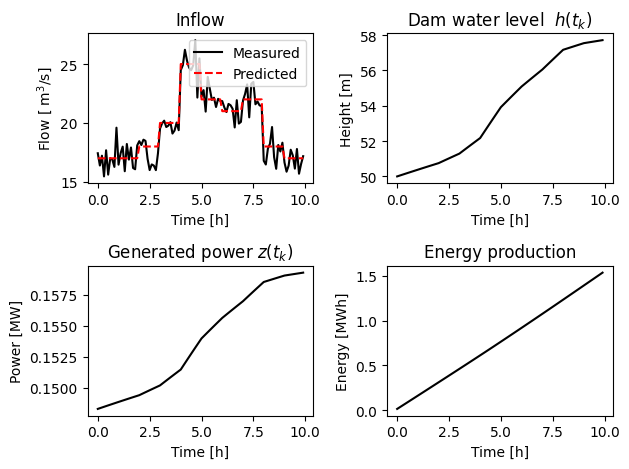

In [4]:
%run task_a.py

### 2. Classification of the model 

The model used for task A can be used to design the setting of the valve of a real reservoir. How can the model be categorized? 

- A: Digital model. 
- B: Digital shadow. 
- C: Digital twin. 
- D: None of the above. 

### 3. Monitoring of the reservoir 

It will often be of interest to the operator of the reservoir to monitor the system from other locations. One way of doing this could be to measure the water-level in real time and illustrate the results on a figure that can be accessed remotely, e.g. online or through an app. How can such a model be categorized? 

- A: Digital model. 
- B: Digital shadow. 
- C: Digital twin. 
- D: None of the above. 

### 4. Meeting the power demand
The city's power demand varies hourly. The power supply from the hydropower plant must always be above the demand which might require that water is saved up in the dam. The task is to meet the minimum required production of power at 10 specified time instances (blue dots) by manually adjusting the sequence of valve configurations in line 18 of `task_b.py`. Select the correct valve setting from the choices below:

- A: `[0.10 , 0.20 , 0.30 , 0.40 , 0.50 , 0.60 , 0.70 , 0.80 , 0.90 , 1.00]`
- B: `[0.20 , 0.30 , 0.50 , 0.30 , 0.40 , 0.80 , 0.90 , 0.80 , 1.00 , 0.50]`
- C: `[0.50 , 0.50 , 0.70 , 0.70 , 0.70 , 1.00 , 1.00 , 1.00 , 1.00 , 1.00]`
- C: `[0.40 , 0.60 , 0.70 , 0.80 , 0.50 , 0.60 , 0.70 , 0.50 , 1.00 , 1.60]`


Sequence of valve configurations:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Sequence of water levels:          [50.   52.52 54.47 56.03 57.35 58.97 59.44 59.14 58.46 56.53]
Power requirement satisfied:       False


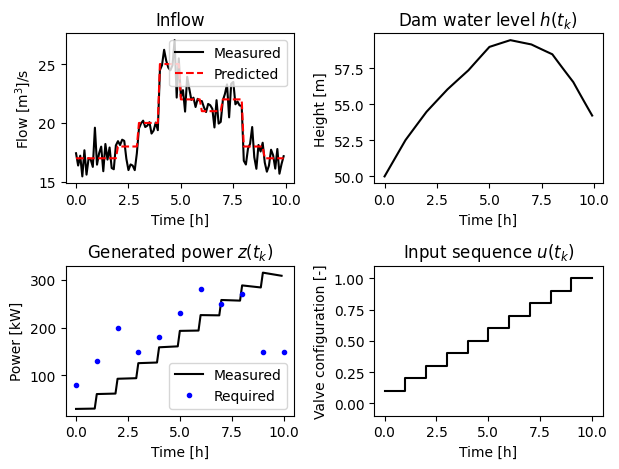

In [5]:
%run task_b.py

## 5. Dynamic control problem
It can be time consuming to find the optimal valve settings for a predicted inflow and required power demand. An alternative to manually guessing the correct valves is to find the valve settings by solving a corresponding dynamic control problem. Such a c control problem is implemented in `task_c.py`. The code finds valve settings that satisfies the power requirement at the 10 time instances if possible.  Run the code `task_c.py`. What is the sequence of the valve configuration?

- A: `[0.27 , 0.44 , 0.66 , 0.50 , 0.60 , 0.75 , 0.91 , 0.83 , 0.90 , 0.51]`
- B: `[0.35 , 0.42 , 0.65 , 0.58 , 0.50 , 0.63 , 0.85 , 0.75 , 0.92 , 0.50]`
- C: `[0.25 , 0.46 , 0.67 , 0.50 , 0.60 , 0.72 , 0.86 , 0.87 , 0.97 , 0.55]`
- D: `[0.32 , 0.53 , 0.64 , 0.52 , 0.65 , 0.78 , 0.80 , 0.85 , 0.90 , 0.60]`


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |        0 (       0)  66.00us (  9.43us)         7
       nlp_g  |   3.00ms (428.57us)   2.05ms (292.71us)         7
  nlp_grad_f  |        0 (       0) 106.00us ( 11.78us)         9
  nlp_hess_l  |  13.00ms (  2.17ms)  14.24ms (  2.37ms)         6
   nlp_jac_g  |   8.00ms (  1.00ms)   8.08ms (  1.01ms)         8
       total  |  29.00ms ( 29.00ms)  30.05ms ( 30.05ms)         1

Sequence of valve configurations:  [0.27 0.44 0.66 0.5  0.6  0.75 0.91 0.83 0.9  0.51]
Sequence of water levels:          [50.   51.61 52.31 51.95 52.

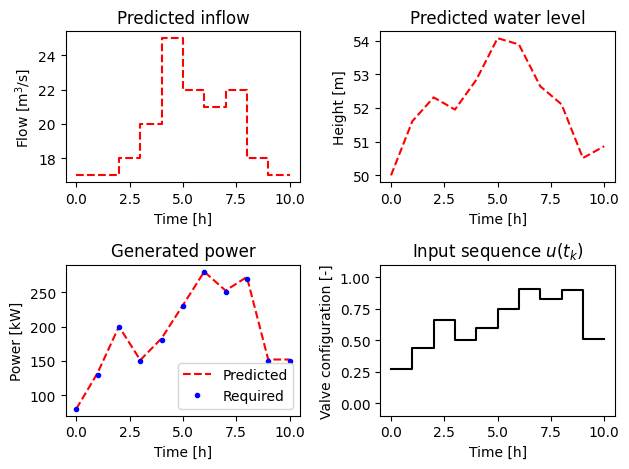

In [3]:
%run task_c.py

## 6. Robustness of implementation

The dynamic control problem in `task_c.py` gives the optimal valve settings for the predicted inflow. However, in real physical systems, the predicted behavior is not always identical to the actual behaviour of the system. Copy the valve setting into line 18 in `task_b.py` to see the effect of small variations in the inflow compared to the predicted inflow. Does the valve settings found in the last question still satisfy the power requirement? 

A simple way of increasing the robustness of the system is to increase the power requirement used to calculate the predicted valve setting. If the buffer is chosen sufficiently large, then deviations in the actual inflow will still satisfy the required power demand. A buffer can be introduced in line 141 in `task_c.py`. Recalculate the valve sequence with a buffer in `task_c.py` and test if the power demand is satisfied for the real system by inserting the valve sequence in `task_b.py`. 

Which of the following statements is correct?

- A: No buffer required (`buffer = 0`).
- B: A buffer of at least 100 W is required (`buffer = 100`).
- B: A buffer of at least 1 kW is required (`buffer = 1000`).
- B: A buffer of at least 10 kW is required (`buffer = 10000`).

In [ ]:
%run task_b.py

### 7. Classification of the model 

While the method described in the last question can give a more robust system, it leads to a larger water requirement. An alternative way to obtain a more robust system is to update the predicted valve sequence every half hour. This can e.g. be done using Model Predictive Control (MPC).
How can a system where the valve is controlled automatically using MPC be classified?

- A: Digital model. 
- B: Digital shadow. 
- C: Digital twin. 
- D: None of the above. 